# **MACHINE LEARNING PROJECT FOREST COVER TYPE PREDICTION**

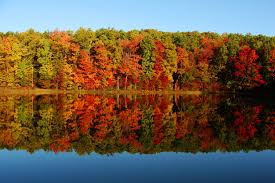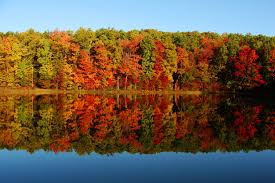

## **1.INTRODUCTION**: 
*Forests play a crucial role in maintaining ecological balance and supporting diverse ecosystems. Understanding and accurately classifying different types of forest cover is essential for effective land management, conservation efforts, and ecological research. In this project, our aim is to develop a predictive model capable of classifying forest cover types based on various geographic and environmental features.* 

## **2.BUSINESS CASE**: 
The goal of the Project is to predict seven different `Cover Types` in four different `Wilderness Areas` of the Roosevelt National Forest of Northern Colorado with the best accuracy.

## **3.IMPORTING THE PYTHON LIBRARIES**

In [1]:
# Libraries for Data Wrangling & Visualisations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Libraries for Modelling & Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Library for Statistical operations
from scipy.stats import skew

# Displaying maximum columns
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)

# Importing Warnings Filter
from warnings import simplefilter

# Ignore all Future Warnings
simplefilter(action='ignore', category=FutureWarning)

# Setting style for plots
sns.set(style="darkgrid")
%matplotlib inline


## **4.LOADING THE DATASET**

In [3]:
# Reading in the dataset
data = pd.read_csv('forest_train.csv')

In [4]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


## **5.TASK: MULTI-CLASS CLASSIFICATION**

# **6.DOMAIN ANALYSIS**

- Each observation is a 30m x 30m patch of forest that are classified as one of seven `Cover_Type`.
- The `Soil_Type` (40 columns) & `Wilderness_Area` (4 Columns) are One Hot Encoded.
- The first columns is `Id` which needs to be set as index.

| Name | Measurement | Description |
| --- | --- | --- |
| Elevation | meters | Elevation in meters |
| Aspect | azimuth | Aspect in degrees azimuth |
| Slope | degrees | Slope in degrees |
| Horizontal Distance To Hydrology | meters | Horz Dist to nearest surface water features |
| Vertical Distance To Hydrology | meters | Vert Dist to nearest surface water features |
| Horizontal Distance To Roadways | meters | Horz Dist to nearest roadway |
| Hillshade 9am | 0 to 255 index | Hillshade index at 9am, summer solstice |
| Hillshade Noon | 0 to 255 index | Hillshade index at noon, summer soltice |
| Hillshade 3pm | 0 to 255 index | Hillshade index at 3pm, summer solstice |
| Horizontal Distance To Fire Points | meters | Horz Dist to nearest wildfire ignition points |
| Wilderness Area (4 binary columns) | 0 (absence) or 1 (presence) | Wilderness area designation |
| Soil Type (40 binary columns) | 0 (absence) or 1 (presence) | Soil Type designation |
| Cover Type | Classes 1 to 7 | Forest Cover Type designation - Response Variable |

1. **Elevation** - Elevation in meters
2. **Aspect** - Aspect in degrees azimuth
3. **Slope** - Slope in degrees
4. **Horizontal_Distance_To_Hydrology** - Horz Dist to nearest surface water features
5. **Slope** - Slope in degrees
6. **Horizontal_Distance_To_Hydrology** - Horz Dist to nearest surface water features
7. **Vertical_Distance_To_Hydrology** - Vert Dist to nearest surface water features
8. **Horizontal_Distance_To_Roadways** - Horz Dist to nearest roadway
9. **Hillshade_9am (0 to 255 index)** - Hillshade index at 9am, summer solstice
10. **Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice
11. **Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice
12. **Horizontal_Distance_To_Fire_Points** - Horz Dist to nearest wildfire ignition points
13. **Wilderness_Area (4 binary columns, 0 = absence or 1 = presence)** - Wilderness area designation
14. **Soil_Type (40 binary columns, 0 = absence or 1 = presence)** - Soil Type designation
15. **Cover_Type (7 types, integers 1 to 7)** - Forest Cover Type designation





The Wilderness Areas are:

1. - Rawah Wilderness Area
2. - Neota Wilderness Area
3. - Comanche Peak Wilderness Area
4. - Cache la Poudre Wilderness Area

The Soil Types are:
1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

#### Dependent/Target Variable
- Cover_Type (7 categories)


## **7.BASIC CHECKS**

In [5]:
data.shape

(15120, 56)

In [7]:
data.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [8]:
# Setting ID column as the index for DataFrame:

data = data.set_index('Id')

In [11]:
data.tail(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15116,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15119,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15120,2475,197,34,319,78,270,189,244,164,914,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [12]:
data.sample(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1549,2726,65,25,67,17,180,234,182,66,2103,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
8856,3289,353,12,725,61,2037,200,219,157,793,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
12355,2121,315,18,85,33,379,169,222,192,484,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
11087,2598,15,19,300,123,2133,200,197,129,595,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
10473,3492,22,9,484,214,1260,214,220,141,1794,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7
7538,2855,20,6,457,183,1075,216,228,149,618,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
6445,2415,51,18,85,38,457,226,198,100,531,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
3737,2208,148,30,150,88,1107,243,221,83,492,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
6171,2378,270,31,67,25,1416,125,233,238,666,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


### **EXAMINE THE DATA**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wildernes

In [14]:
# Checking the details for Maximum Elevation:

data.iloc[data['Elevation'].argmax()]

Elevation                             3849
Aspect                                 353
Slope                                    9
Horizontal_Distance_To_Hydrology       984
Vertical_Distance_To_Hydrology          73
Horizontal_Distance_To_Roadways       4592
Hillshade_9am                          204
Hillshade_Noon                         224
Hillshade_3pm                          158
Horizontal_Distance_To_Fire_Points    2642
Wilderness_Area1                         0
Wilderness_Area2                         0
Wilderness_Area3                         1
Wilderness_Area4                         0
Soil_Type1                               0
Soil_Type2                               0
Soil_Type3                               0
Soil_Type4                               0
Soil_Type5                               0
Soil_Type6                               0
Soil_Type7                               0
Soil_Type8                               0
Soil_Type9                               0
Soil_Type10

### **STASTICAL MEASURE OF DATA**

In [15]:
data.describe(include='all')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.00000

In [16]:
# Checking the Skewness of all the features:

print('Skewness of the below features:')
print(data.skew())

Skewness of the below features:
Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                           

# **8.EXPLORATORY DATA ANALYSIS**

## UNIVARATE,BIVARIATE & MULTIVARIATE ANALYSIS

###  **Important Plots**

In [17]:
data.Wilderness_Area1.value_counts()

Wilderness_Area1
0    11523
1     3597
Name: count, dtype: int64

In [18]:
data.Wilderness_Area2.value_counts()

Wilderness_Area2
0    14621
1      499
Name: count, dtype: int64

In [19]:
data.Wilderness_Area3.value_counts()

Wilderness_Area3
0    8771
1    6349
Name: count, dtype: int64

In [20]:
data.Wilderness_Area4.value_counts()

Wilderness_Area4
0    10445
1     4675
Name: count, dtype: int64

<Axes: xlabel='Elevation', ylabel='Density'>

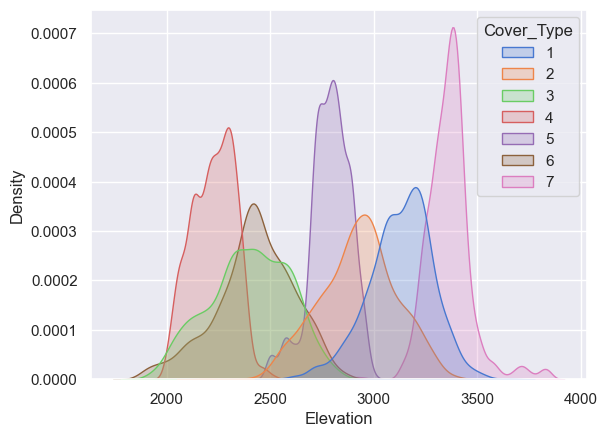

In [21]:
sns.kdeplot(data=data, x="Elevation", hue="Cover_Type", fill=True, palette='muted')

From above plot, we can see,

- `Type 7` Cover is densely populated in the Highest Elevation Range. (3100m-3500m approx.)
- `Type 4` Cover is densely populated in the Lowest Elevation Range. (2000m-2500m approx.)
- `Type 4`, `Type 5` & `Type 7` Covers almost never Overlap. They exist in separate Elevation Ranges.
- `Type 3` & `Type 6` are populated at almost same Elevation Range.

In [22]:
# Creating a copy of Continuous DataFrame for Merging Wilderness Columns:

Wild_df = data[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Cover_Type']].copy()


In [23]:
Wild_df

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
Id,,,,,
1,1,0,0,0,5
2,1,0,0,0,5
3,1,0,0,0,2
4,1,0,0,0,2
5,1,0,0,0,5
...,...,...,...,...,...
15116,0,0,1,0,3
15117,0,0,1,0,3
15118,0,0,1,0,3


In [24]:
# Change Values for the colums to be unique:

Wild_df['Wilderness_Area2'] = Wild_df['Wilderness_Area2'].replace([1], 2)
Wild_df['Wilderness_Area3'] = Wild_df['Wilderness_Area3'].replace([1], 3)
Wild_df['Wilderness_Area4'] = Wild_df['Wilderness_Area4'].replace([1], 4)

In [25]:
# Adding Wilderness Binary Columns to make a new column Called 'Wilderness'
# Define a custom function to combine columns:

def combine_columns(row):
    return row['Wilderness_Area1'] + row['Wilderness_Area2'] + row['Wilderness_Area3'] + row['Wilderness_Area4']

# Apply the custom function to each row of the DataFrame
Wild_df['Wilderness'] = Wild_df.apply(combine_columns, axis=1)

In [26]:
# Check the number of unique values:
Wild_df.Wilderness.nunique()

4

In [27]:
Wild_df.value_counts().sum()

15120

In [28]:
Wild_df

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,Wilderness
Id,,,,,,
1,1,0,0,0,5,1
2,1,0,0,0,5,1
3,1,0,0,0,2,1
4,1,0,0,0,2,1
5,1,0,0,0,5,1
...,...,...,...,...,...,...
15116,0,0,3,0,3,3
15117,0,0,3,0,3,3
15118,0,0,3,0,3,3


In [29]:
# Drop unnecessary columns from 'Wild_df':

Wild_df.drop(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'], axis=1, inplace=True)

In [30]:
Wild_df

,Cover_Type,Wilderness
Id,,
1,5,1
2,5,1
3,2,1
4,2,1
5,5,1
...,...,...
15116,3,3
15117,3,3
15118,3,3


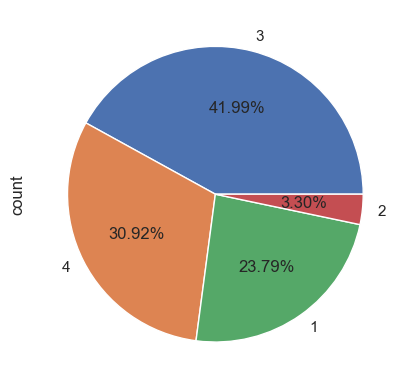

In [31]:
# Percentage wise distribution of each Wilderness Area:

Wild_df["Wilderness"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

From the above Pie Chart, we see that,

- `Wilderness Area 3` has the highest presence in the Dataset. (42%)
- `Wilderness Area 2` has either very low representation in the Dataset or the Area does not occur frequently. (3.3%)

<Axes: xlabel='Wilderness', ylabel='count'>

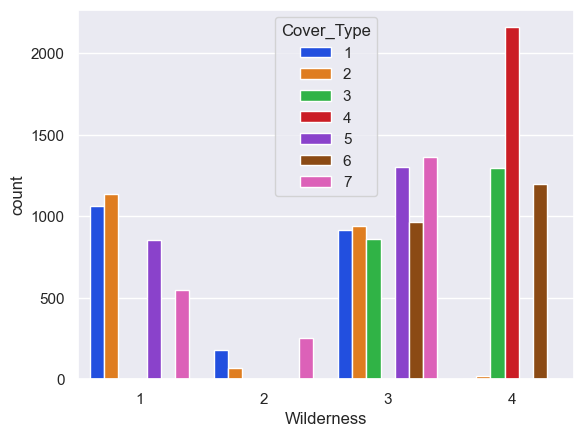

In [32]:
# Now, we can plot all Wilderness Areas against the Cover Types:

sns.countplot(data=Wild_df, x="Wilderness", hue="Cover_Type", palette='bright')

The above plot explains that,

- `Wilderness Area 2` has only 3 Cover Types.
- `Wilderness Area 3` has 6 Cover Types that are almost balanced.
- Cover Type 4 exists almost entirely in `Wilderness Area 4`.
- Cover Types 3 and Cover Type 6 are only found in `Wilderness Area 3` & `Wilderness Area 4`.

### CORRELATIONS: INITIAL OBSERVATION

<Axes: >

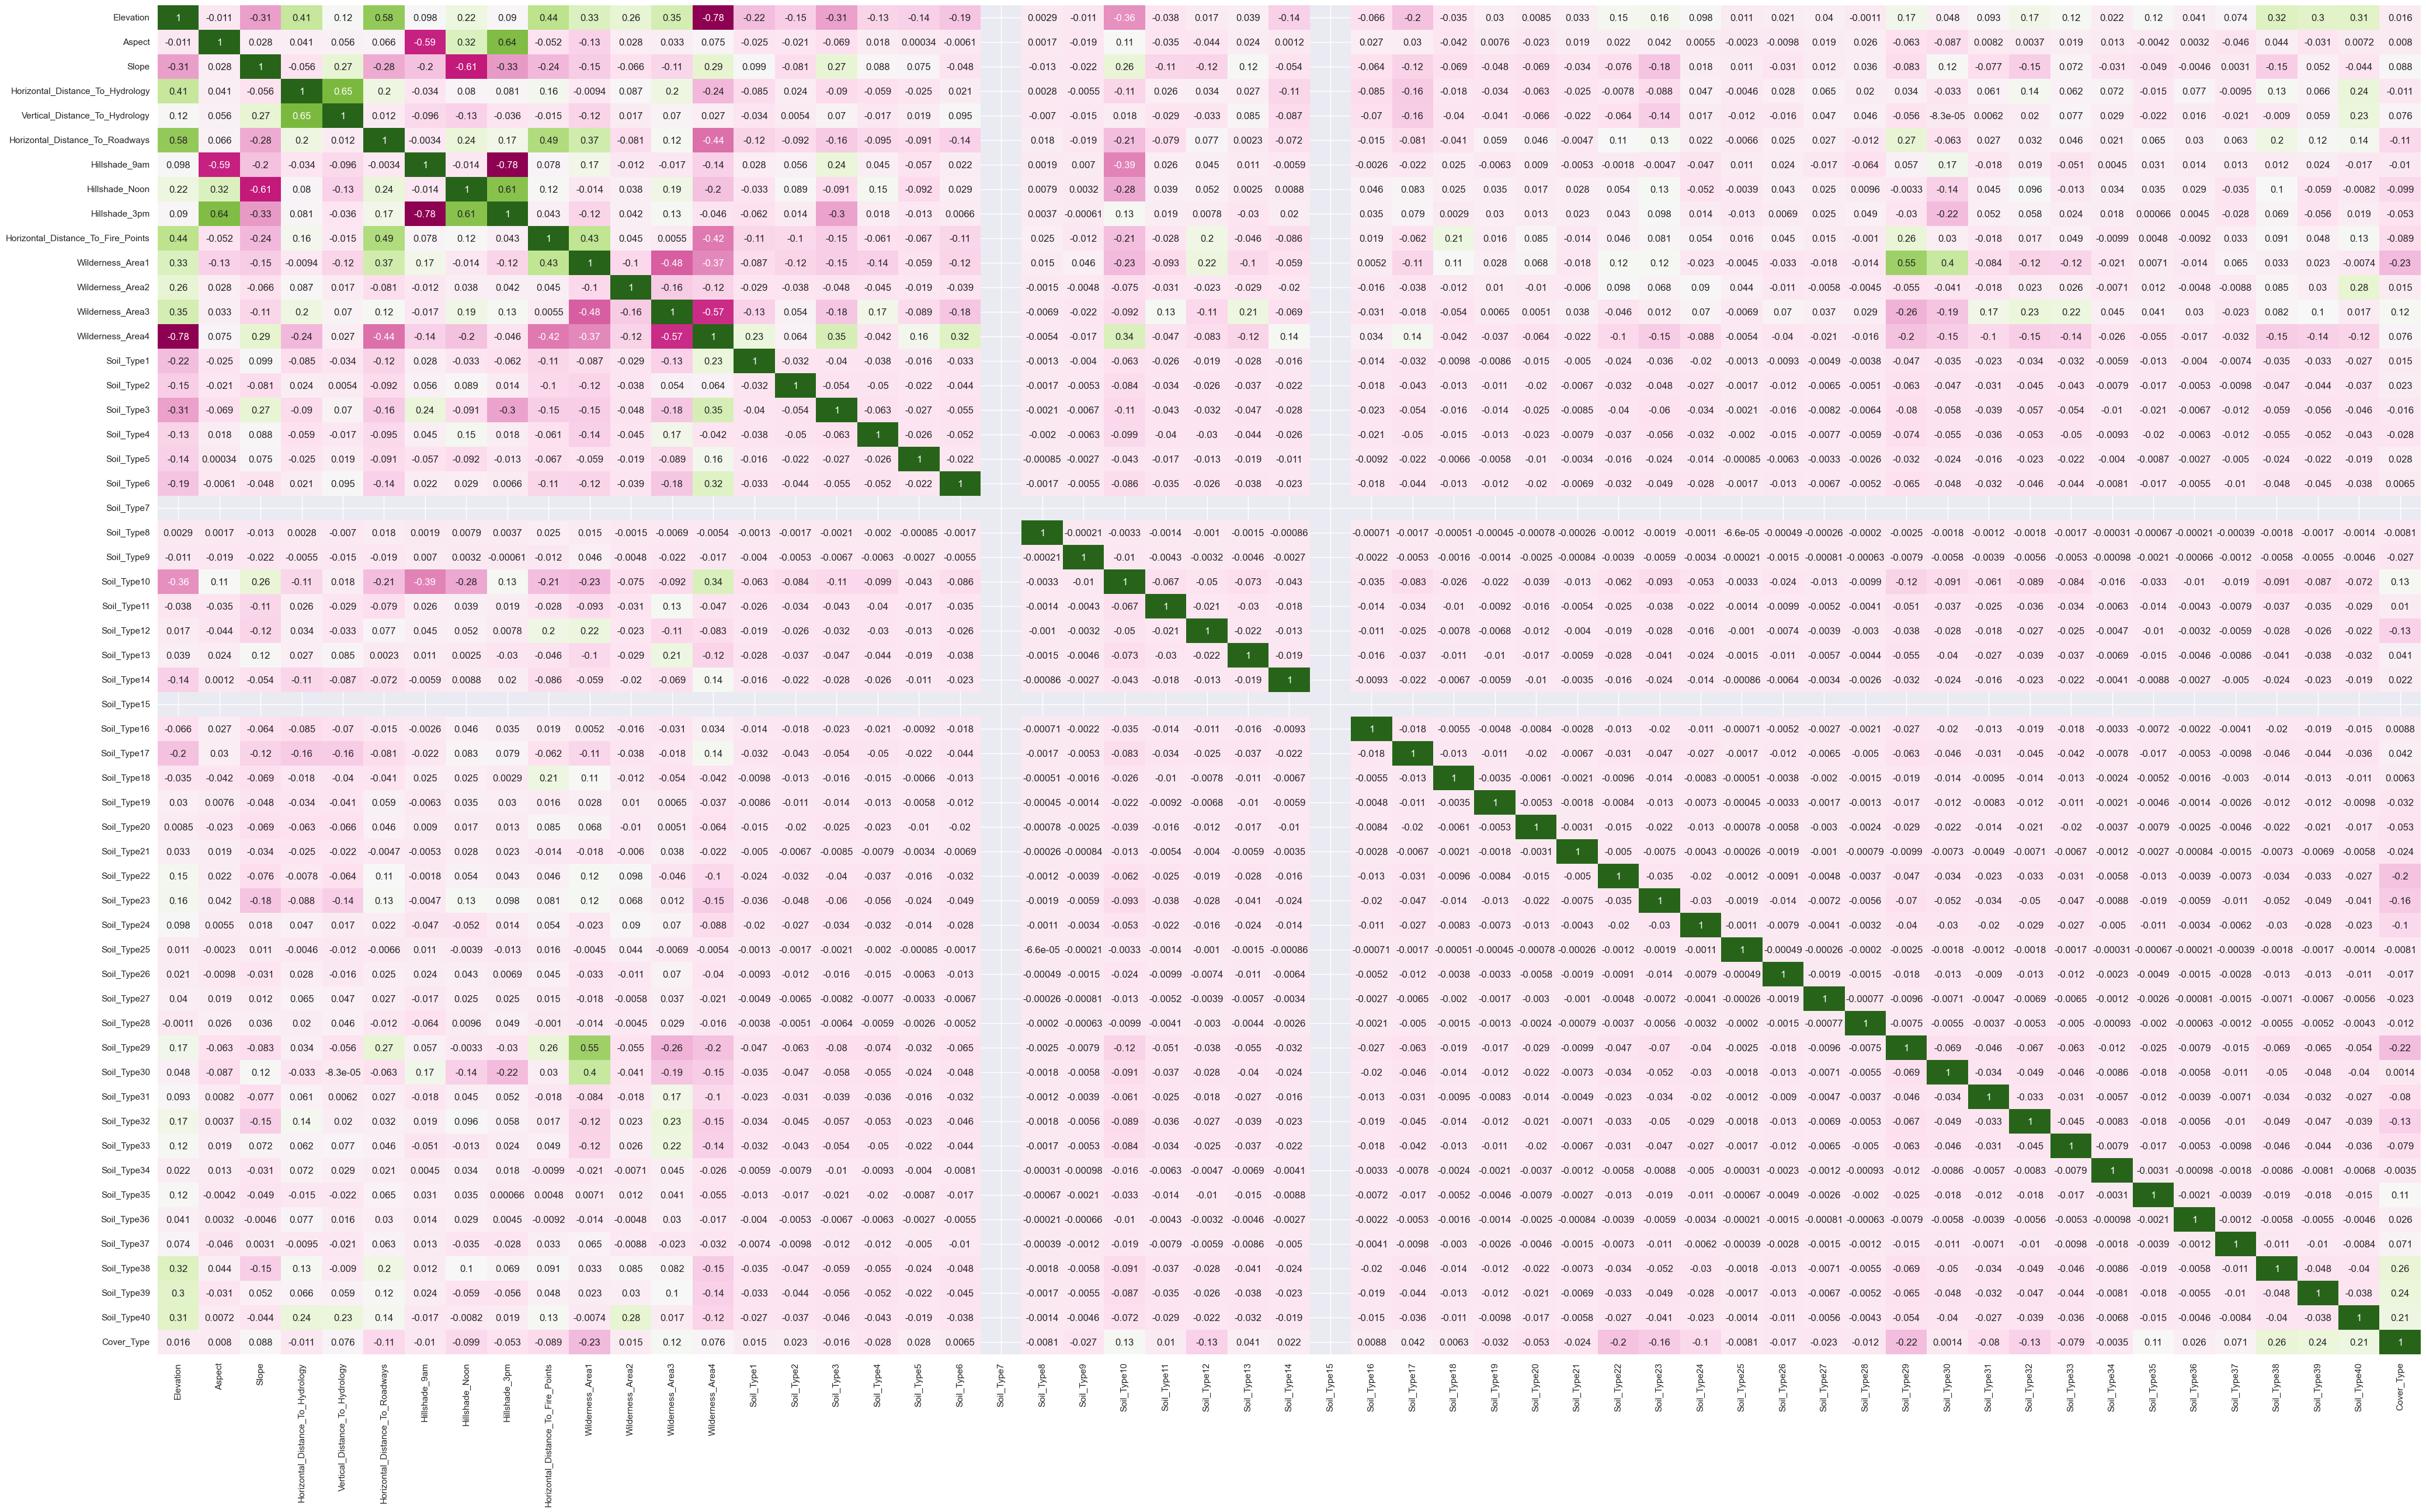

In [33]:
# Heatmap:
plt.figure(figsize = (50,30))
sns.heatmap(data.corr(), cmap='PiYG', annot=True, cbar=False)

In [34]:
# Checking Correlations of each feature with respect to Target Variable:

data.corr()["Cover_Type"].abs().sort_values(ascending=False)


Cover_Type                            1.000000
Soil_Type38                           0.257810
Soil_Type39                           0.240384
Wilderness_Area1                      0.230117
Soil_Type29                           0.218564
Soil_Type40                           0.205851
Soil_Type22                           0.195993
Soil_Type23                           0.158762
Soil_Type32                           0.132312
Soil_Type12                           0.129985
Soil_Type10                           0.128972
Wilderness_Area3                      0.122146
Soil_Type35                           0.114327
Horizontal_Distance_To_Roadways       0.105662
Soil_Type24                           0.100797
Hillshade_Noon                        0.098905
Horizontal_Distance_To_Fire_Points    0.089389
Slope                                 0.087722
Soil_Type31                           0.079882
Soil_Type33                           0.078955
Wilderness_Area4                      0.075774
Vertical_Dist

Pearson Correlation Coefficient r:

| Absolute Value of r| Strength of Relationship|
| --- | --- |
| r < 0.3 | None or very weak |
| 0.3 < r <0.5 | Weak |
| 0.5 < r < 0.7 | Moderate |
| r > 0.7 | Strong |

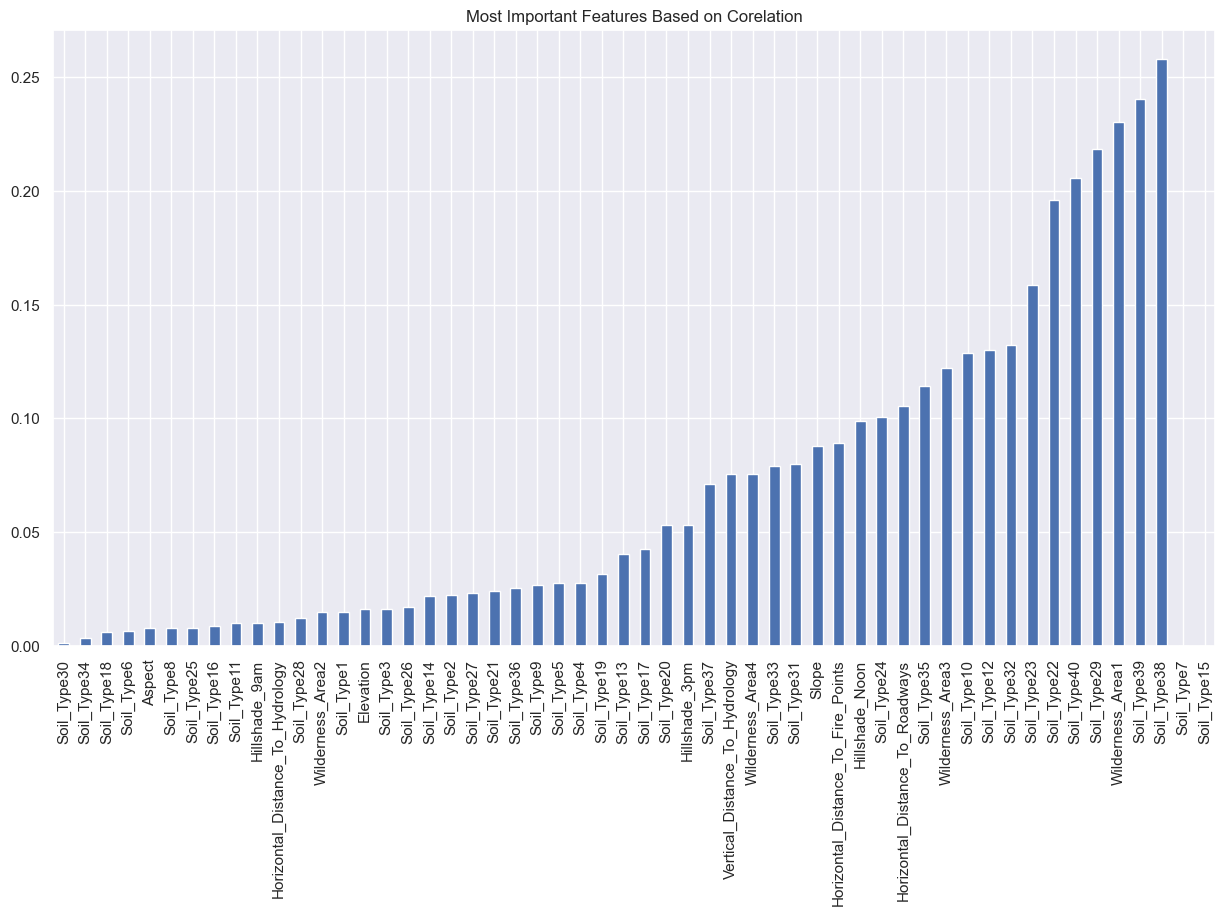

In [35]:
# Plotting above correlations:

plt.figure(figsize=(15,8))
d = data.corr()['Cover_Type'][:-1].abs().sort_values().plot(kind='bar', title='Most Important Features Based on Corelation')

plt.show()


- The `Soil_Type7` and `Soil_Type15` have no correlations shown in above plot.

- Let's explore these 2 soil types to understand them.

In [36]:
data.Soil_Type7.value_counts()

Soil_Type7
0    15120
Name: count, dtype: int64

In [37]:
data.Soil_Type15.value_counts()

Soil_Type15
0    15120
Name: count, dtype: int64

### **EDA SUMMARY**


- The `Wilderness_Area1`, `Soil_Type38` and `Soil_Type39` are top 3 features that show some correlation.
- There are No Strongly correlated features based on the Correlation Bar Plot.
- We have highly skewed data as well.
- The `Soil_Type7` and `Soil_Type15` only contain 0 value it them.

# **9. DATA PREPROCESSING**

### CHECK MISSING VALUES & UNWANTED COLUMNS

In [38]:
data.isna().sum().any()

False

- There are NO missing values.
- All columns seem to be important as of now. No need to delete any columns.

### CHECK DUPLICATES

In [39]:
data.duplicated().any()

False

- There are NO duplicate rows in this dataset.

### CHECK COLUMN DATA TYPES 

In [40]:
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

- All columns are `int64`, so no need to change the data types as of now.

### CHECK IMBALANCE DATA 

In [41]:
data['Cover_Type'].value_counts()

Cover_Type
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: count, dtype: int64

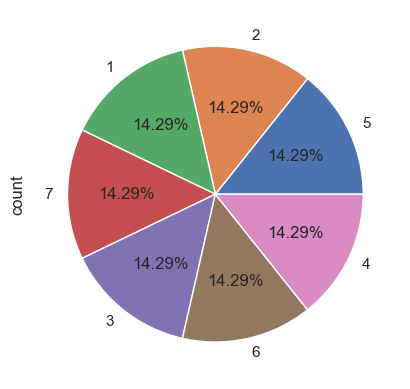

In [42]:
data["Cover_Type"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

- The Dataset is Balanced. No need for sampling.
- Each Cover Types amounts to 14.29% in the Dataset.

###  CREATING NUMERICALS & CATEGORICAL LISTS

Creating Subsets of Main DataFrame for exploration:

1. `cont_data` - Data without binary features i.e continuous features
2. `binary_data` - Data having all binary features [Wilderness Areas + Soil Types]
3. `Wilderness_data` - Binary Wilderness Areas
4. `Soil_data` - Binary Soil Types

In [43]:
cont_data = data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_data = data.loc[:,'Wilderness_Area1':'Soil_Type40']

Wilderness_data = data.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

Soil_data = data.loc[:,'Soil_Type1':'Soil_Type40']

### CHECK OUTLIERS 

In [44]:
# Checking for outliers in the Continuous Data: 
cont_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Id,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279
2,2590,56,2,212,-6,390,220,235,151,6225
3,2804,139,9,268,65,3180,234,238,135,6121
4,2785,155,18,242,118,3090,238,238,122,6211
5,2595,45,2,153,-1,391,220,234,150,6172
...,...,...,...,...,...,...,...,...,...,...
15116,2607,243,23,258,7,660,170,251,214,1282
15117,2603,121,19,633,195,618,249,221,91,1325
15118,2492,134,25,365,117,335,250,220,83,1187


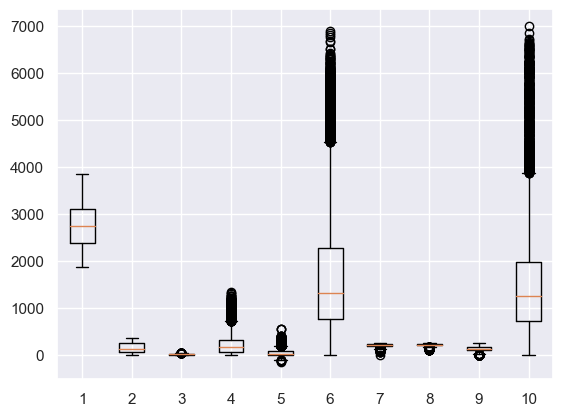

In [45]:
# Plotting Outliers for all Continuous Variable Columns:

fig, ax = plt.subplots()
ax.boxplot(cont_data)
#ax.set_title()
plt.show()


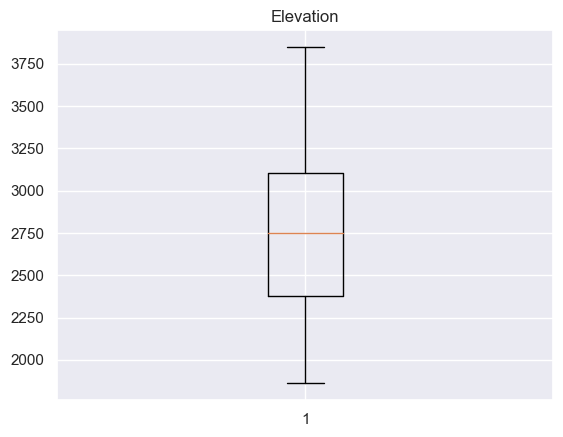

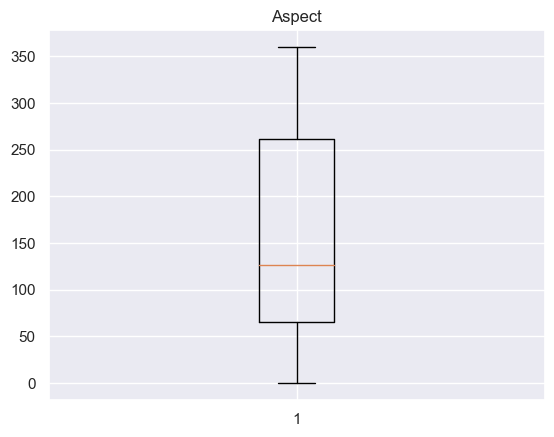

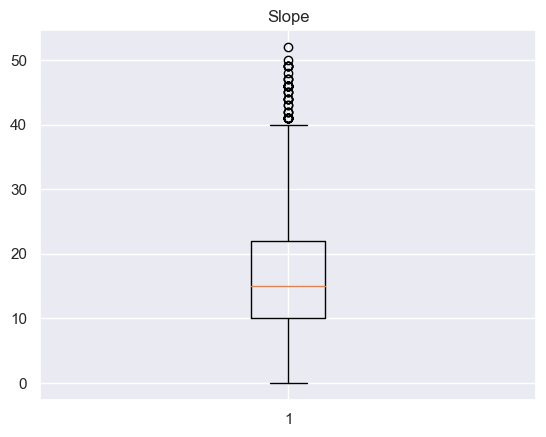

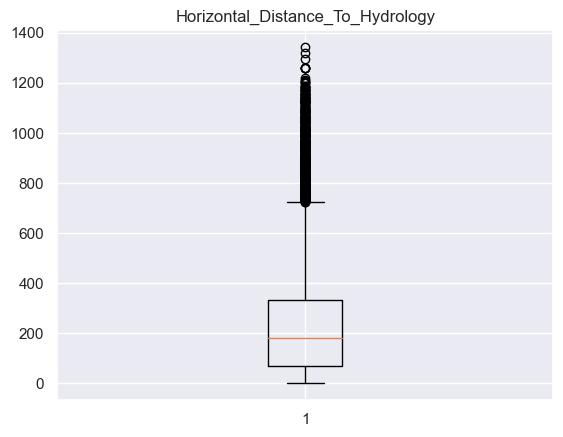

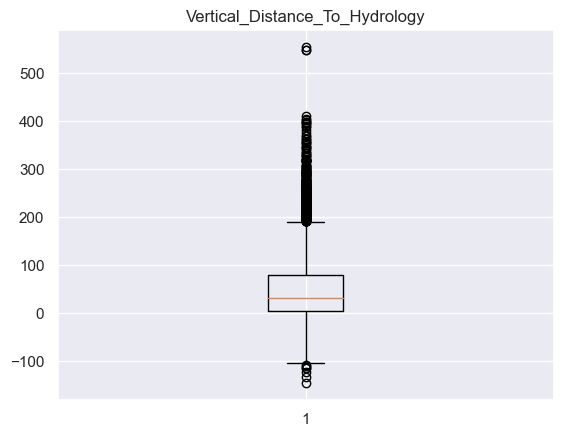

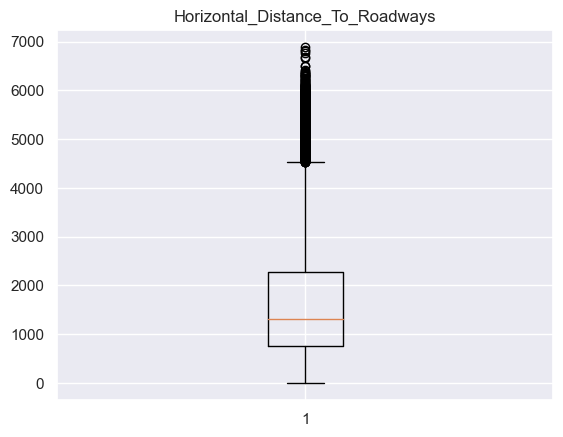

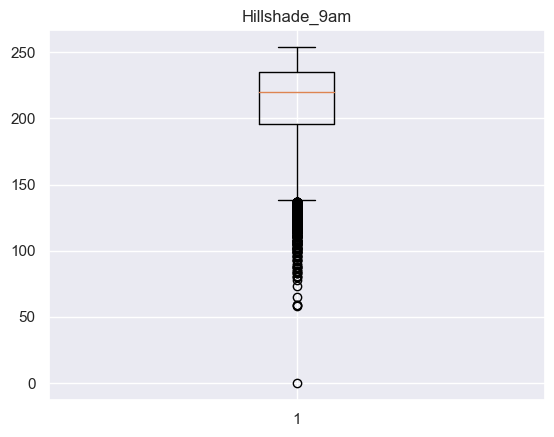

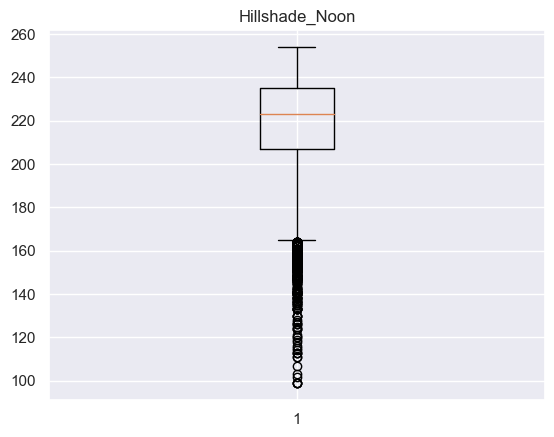

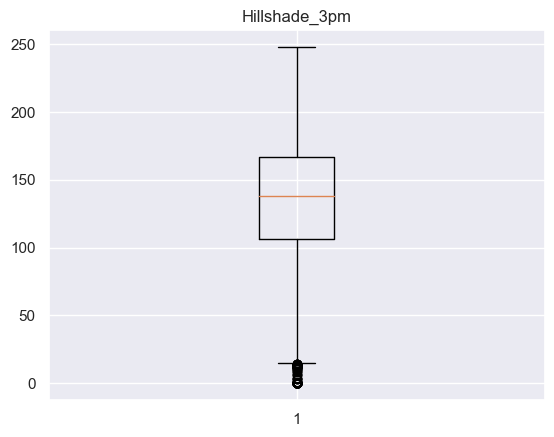

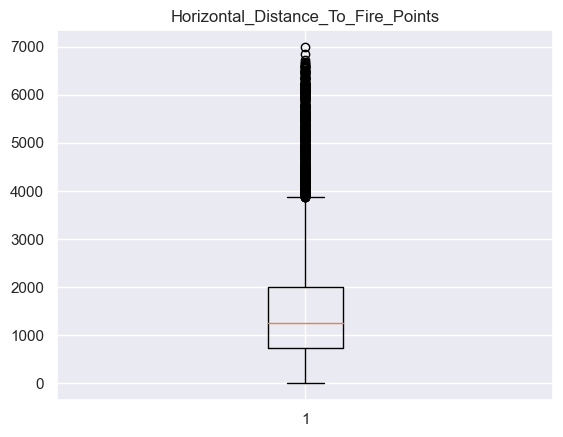

In [46]:
# Plotting Outliers for individual Continuous Variable Column

for col in cont_data:
    fig, ax = plt.subplots()
    ax.boxplot(cont_data[col])
    ax.set_title(col)
    plt.show()


From the above plots, we see,

- `Elevation` and `Aspect` do not have any outliers.
- All other features have significant outliers.
- We need to Treat the outliers in order to understand the correlations better and build better models.

**Tukey's IQR method**

Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

Procedure:

1. Find the first quartile, Q1.
2. Find the third quartile, Q3.
3. Calculate the IQR. IQR = Q3-Q1.
4. Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.

Any data point outside this range is considered as outlier and should be removed for further analysis.

In [47]:
# Defining list of Continuous Features:

feature_list = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                'Horizontal_Distance_To_Fire_Points']

In [48]:
# Defining a function for getting the Outliers:

def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column], 75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [49]:
# Detecting Outliers:

Outliers_IQR = IQR_method(data,1,feature_list)


Total number of outliers is: 645


In [50]:
# % of outliers:

(645 / 15120) * 100

4.265873015873016

- Since the outliers are 4.26% and we are dealing with heavily skewed and non correlated data, we will drop the Observations that are outliers.

In [51]:
# Dropping Outliers:
data_out = data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)
cont_out = cont_data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [52]:
data_out.shape

(14563, 55)

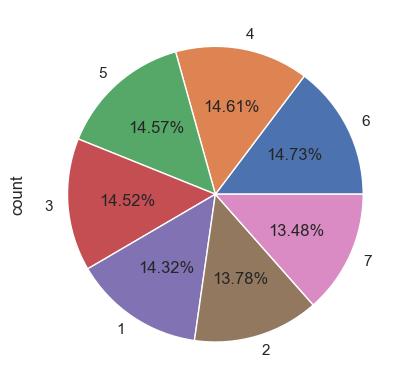

In [53]:
# Checking if we still have balanced data after Outlier removal.
# This is done to make sure that we have not deleted the most important data.

data_out["Cover_Type"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

- The above Pie Chart shows that the data is still relatively Balanced.

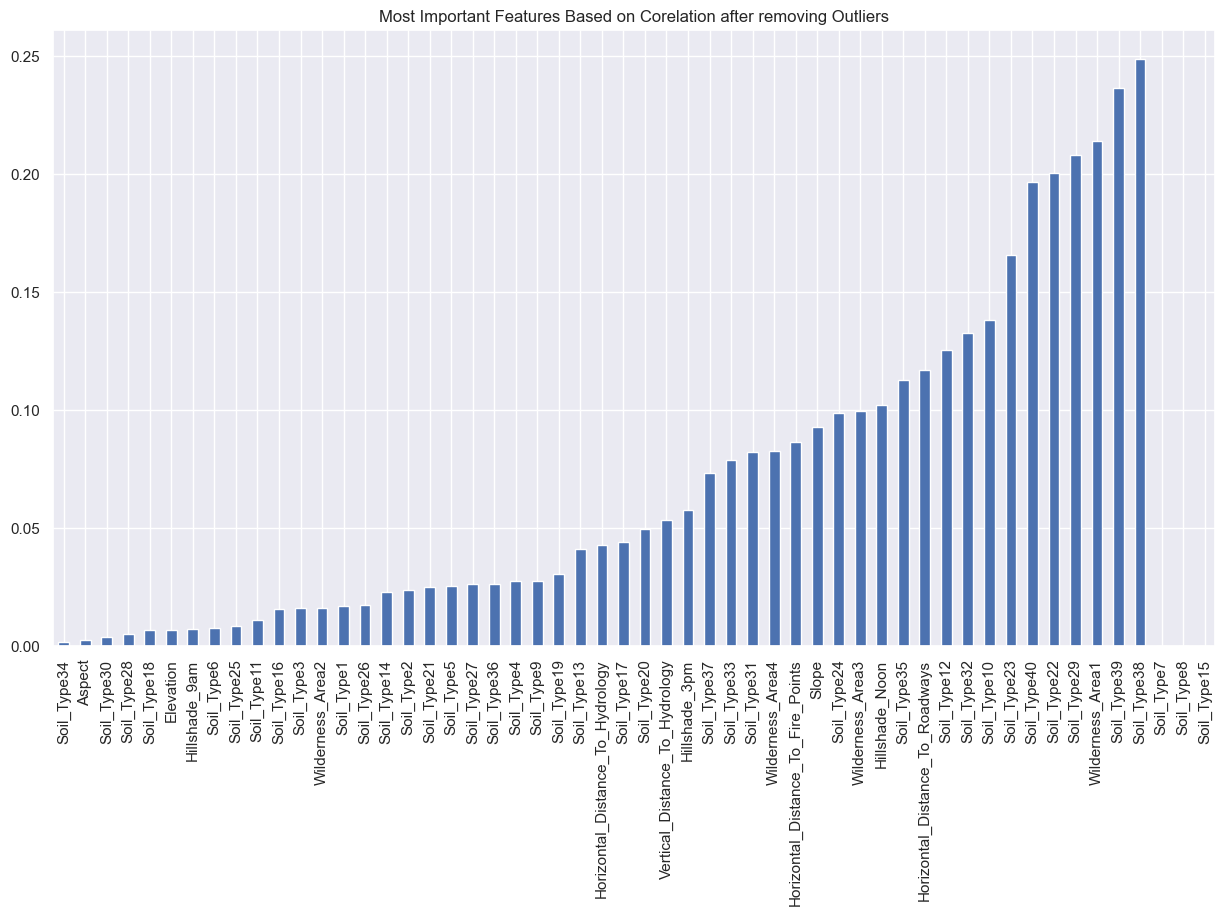

In [54]:
# Plotting Important correlations after removing outliers:

plt.figure(figsize=(15,8))
d = data_out.corr()['Cover_Type'][:-1].abs().sort_values().plot(kind='bar', title='Most Important Features Based on Corelation after removing Outliers')

plt.show()

### CORRELATIONS : FINAL OBSERVATIONS

In [55]:
data_out.corr()['Cover_Type'][:-1].abs().sort_values()

Soil_Type34                           0.001871
Aspect                                0.002435
Soil_Type30                           0.003747
Soil_Type28                           0.005061
Soil_Type18                           0.006669
Elevation                             0.006952
Hillshade_9am                         0.007423
Soil_Type6                            0.007493
Soil_Type25                           0.008334
Soil_Type11                           0.011232
Soil_Type16                           0.015581
Soil_Type3                            0.015986
Wilderness_Area2                      0.016336
Soil_Type1                            0.016994
Soil_Type26                           0.017487
Soil_Type14                           0.022939
Soil_Type2                            0.023871
Soil_Type21                           0.024990
Soil_Type5                            0.025288
Soil_Type27                           0.026401
Soil_Type36                           0.026510
Soil_Type4   

In [56]:
binary_data.std().sort_values()


Soil_Type15         0.000000
Soil_Type7          0.000000
Soil_Type25         0.008133
Soil_Type8          0.008133
Soil_Type28         0.024391
Soil_Type9          0.025710
Soil_Type36         0.025710
Soil_Type27         0.031482
Soil_Type21         0.032514
Soil_Type34         0.038118
Soil_Type37         0.047368
Soil_Type19         0.055075
Soil_Type26         0.059657
Soil_Type18         0.062871
Soil_Type35         0.081859
Soil_Type16         0.086506
Soil_Type20         0.095442
Soil_Type5          0.103896
Soil_Type14         0.105133
Soil_Type12         0.121609
Soil_Type24         0.129265
Soil_Type31         0.146550
Soil_Type22         0.149326
Soil_Type1          0.151424
Soil_Type11         0.161656
Soil_Type40         0.171574
Soil_Type13         0.174621
Wilderness_Area2    0.178649
Soil_Type17         0.197080
Soil_Type33         0.197696
Soil_Type2          0.198768
Soil_Type6          0.202840
Soil_Type39         0.203880
Soil_Type32         0.208699
Soil_Type30   

<Axes: >

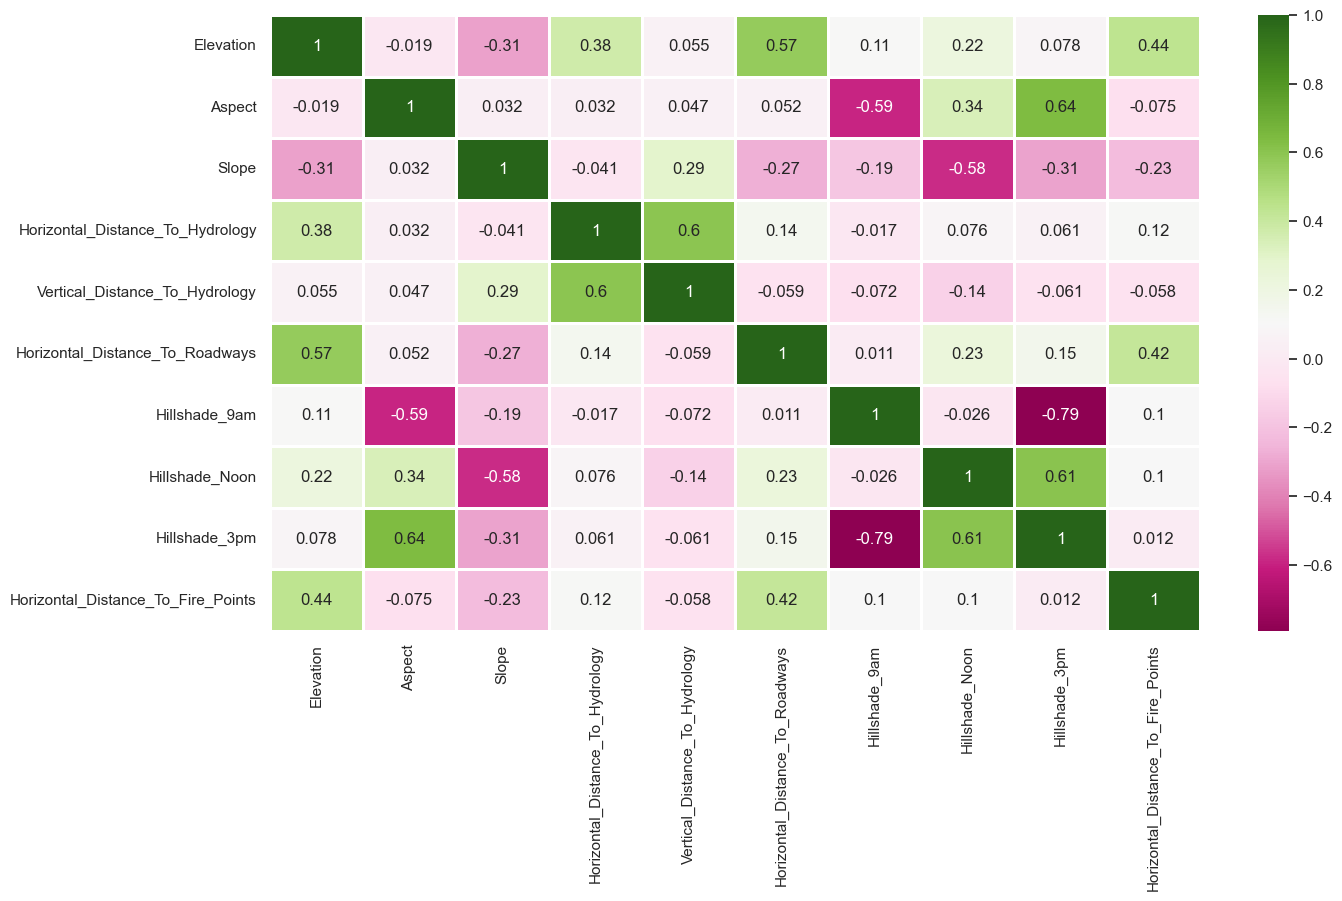

In [57]:
# Heatmap for Outliers Removed Continuous Data:

plt.figure(figsize=(15,8))
sns.heatmap(cont_out.corr(),cmap='PiYG',linecolor='white',linewidths=1,annot=True)

<Axes: >

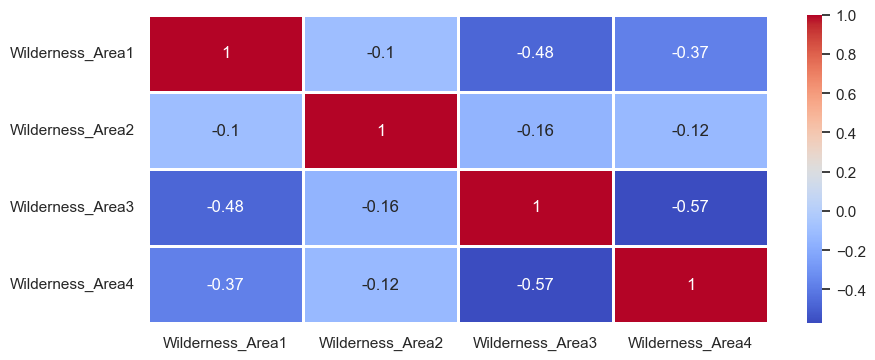

In [58]:
# Heatmap for Wilderness Data:

plt.figure(figsize=(10,4))
sns.heatmap(Wilderness_data.corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)


In [ ]:
# PairGrid for the Outliers Removed Continuous Data:

g = sns.PairGrid(cont_out)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()


### **FEATURE ENGINEERING**

### CREATING NUMERIC & CATEGORICAL LISTS FOR FEATURE TRANSFORMATION 

In [133]:
# Creating a List of Numeric Columns:

numeric_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                'Horizontal_Distance_To_Fire_Points']

# We do not have any Categorical Columns

## **SPLITING  THE DATA**


In [134]:
X = data_out.loc[:,'Elevation':'Soil_Type40'] # Predictors
y = data_out['Cover_Type'] # Target

In [135]:
# Splitting the data into  train and test
# Use Stratified split if you want a column to split atleast 1 unique values always

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [136]:
X_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
12979,2916,192,18,300,78,899,216,251,162,2268,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
363,2739,130,8,134,26,2160,234,236,133,1366,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1878,3379,280,11,408,3,3055,191,241,190,1910,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
457,2968,120,9,365,51,5386,236,232,127,2557,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1971,2716,322,23,319,139,1146,154,209,192,2084,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,2233,230,23,216,-4,391,177,253,206,573,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10501,2398,69,17,331,124,330,236,204,94,1034,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8579,3393,162,3,424,44,1920,222,240,153,2415,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9700,3442,125,32,360,85,2424,253,198,46,934,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# **10.FEATURE SCLAING**

In [137]:
from sklearn.preprocessing import StandardScaler

Standard_Scaler = StandardScaler()
X_train_ss = Standard_Scaler.fit_transform(X_train[numeric_columns])
X_test_ss = Standard_Scaler.transform(X_test[numeric_columns])

In [138]:
X_train_ss

array([[ 0.43552933,  0.32555215,  0.19755   , ...,  1.44383963,
         0.59615737,  0.76153813],
       [ 0.00499772, -0.23909746, -1.01706446, ...,  0.75919637,
        -0.04832532, -0.09876491],
       [ 1.56172221,  1.1269903 , -0.65268012, ...,  0.98741079,
         1.21841652,  0.42008748],
       ...,
       [ 1.59577555,  0.05233459, -1.62437168, ...,  0.94176791,
         0.3961455 ,  0.90174273],
       [ 1.71496227, -0.28463372,  1.89801024, ..., -0.97523323,
        -1.98177337, -0.51079474],
       [ 0.95849147,  0.11608536, -1.25998735, ...,  1.07869656,
         0.37392196,  0.31040361]])

In [139]:
X_test_ss

array([[ 0.19958828,  0.89020176,  0.68339578, ...,  1.30691098,
         1.81845212, -0.53177775],
       [-0.40121008,  0.17983612, -0.16683434, ...,  1.2612681 ,
         0.30725134,  0.40005825],
       [-1.60280679, -0.48499326,  1.65508735, ..., -1.47730495,
        -2.13733816, -1.24710732],
       ...,
       [ 1.2114592 , -0.75821081, -0.16683434, ..., -0.42751862,
        -0.73725508,  0.64994672],
       [ 0.32120738,  1.30002809, -0.89560301, ...,  0.80483926,
         1.01840465, -0.00911027],
       [-0.53499109, -0.26641922, -0.53121867, ...,  0.57662483,
        -0.33723135, -0.92759345]])

### FEATURE ENCODING 

- The Features are all  `Numeric`.
- `Soil Types` & `Wilderness Areas` are already One Hot Encoded.
- No need for Futher Feature Encoding as of now.
- As our Target Variable is `Numeric`, we don't need to Label Encode it. (If the Target is categorical, LabelEncoder() should be used before the Train-Test Split.)

### FEATURE SELECTION

- We have selected the Outlier Removed DataFrame: `data_out`
- We have then applied Stratified Train-Test Split.
- `StandardScaler()` has been used for Feature Scaling.
- Now, we will try Pearson Correlation for Feature Selection.

**Feature Selection**: Based on Pearson Correlation

- We will use the same `X_train` and `y_train` as they contain scaled data.
- We will create new DataFrame with dropped columns based on Low Correlation.


In [173]:
# A list of least correlated features to be removed:

rem = ['Soil_Type34', 'Soil_Type30', 'Soil_Type28',
       'Soil_Type18', 'Soil_Type6']

In [174]:
X_train_cr = X_train.drop(rem, axis=1) # 5 Columns will be dropped

In [175]:
X_test_cr = X_test.drop(rem, axis=1)

In [176]:
X_train_cr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
12979,2916,192,18,300,78,899,216,251,162,2268,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
363,2739,130,8,134,26,2160,234,236,133,1366,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1878,3379,280,11,408,3,3055,191,241,190,1910,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
457,2968,120,9,365,51,5386,236,232,127,2557,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1971,2716,322,23,319,139,1146,154,209,192,2084,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,2233,230,23,216,-4,391,177,253,206,573,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10501,2398,69,17,331,124,330,236,204,94,1034,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8579,3393,162,3,424,44,1920,222,240,153,2415,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9700,3442,125,32,360,85,2424,253,198,46,934,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Feature Engineering Summary:

1. We have Raw Data: `X_train` and `X_test`
2. We have Standard Scaler Tranformed Data: `X_train_ss` and `X_test_ss`
3. We have Data selected based on Pearson Correlation: `X_train_cr` and `X_test_cr`

##  **11.MODEL BUILDING**

### INITIAL TESTING ON CLASSIFIERS

In [177]:
# Importing important models:

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier


In [182]:
%%time

# A List to store the Accuracy Scores
MLA = [] 

# A list of Algorithms to pass into a function:
Z = [LinearSVC() , 
     DecisionTreeClassifier() ,
     LogisticRegression(max_iter=10000) , 
     GaussianNB() , 
     RandomForestClassifier() , 
     GradientBoostingClassifier(), 
     KNeighborsClassifier()]

# A list of names for each Algorithm:
Q = ["LinearSVC" , 
     "DecisionTreeClassifier" , 
     "LogisticRegression" , 
     "GaussianNB" , 
     "RandomForestClassifier" , 
     "GradientBoostingClassifier", 
     'KNNeighborsClassifier']

# Defining a function to Train and Predict on multiple Algorithms:
for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train_cr , y_train )
    pred = model.predict(X_test_cr)
    MLA.append(accuracy_score(pred, y_test))
    

/Users/bhushan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/bhushan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 4min 25s, sys: 4min 8s, total: 8min 34s
Wall time: 1min 43s


In [183]:
# Creating a Dictionary:
d = { "Algorithm" : Q, "Model Accuracy" : MLA }

# Creating a DataFrame from the Dictionary:
dfm = pd.DataFrame(d)
dfm


,Algorithm,Model Accuracy
0,LinearSVC,0.471848
1,DecisionTreeClassifier,0.763801
2,LogisticRegression,0.673167
3,GaussianNB,0.585004
4,RandomForestClassifier,0.854985
5,GradientBoostingClassifier,0.795111
6,KNNeighborsClassifier,0.792365


### **VOTING CLASSIFER**

In [231]:
models=[]

models.append(("KNN",KNeighborsClassifier()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Random Forest",RandomForestClassifier()))


In [232]:
models

[('KNN', KNeighborsClassifier()),
 ('Logistic Regression', LogisticRegression()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('Random Forest', RandomForestClassifier())]

In [251]:
from sklearn.ensemble import VotingClassifier

vt = VotingClassifier(estimators=models, voting='hard')
vt.fit(X_train_cr,y_train)
y_pred = vt.predict(X_test_cr)


/Users/bhushan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [252]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.72      0.78      0.75       521
           2       0.74      0.60      0.66       502
           3       0.79      0.83      0.81       528
           4       0.91      0.98      0.94       532
           5       0.89      0.94      0.91       531
           6       0.85      0.77      0.81       536
           7       0.92      0.95      0.94       491

    accuracy                           0.83      3641
   macro avg       0.83      0.83      0.83      3641
weighted avg       0.83      0.83      0.83      3641



In [253]:
accuracy_score(y_pred, y_test)


0.8346608074704751

In [259]:
X_train_cr.shape

(10922, 49)

In [245]:
# Printing number of misclassified samples:

count_misclassified = (y_test != y_pred).sum()
print(f'Misclassified no. of samples: {count_misclassified}')

Misclassified no. of samples: 597


In [190]:
confusion_matrix(y_test,y_pred)


array([[352, 109,   0,   0,   8,   1,  51],
       [109, 296,  16,   0,  52,  22,   7],
       [  0,   3, 416,  37,   9,  63,   0],
       [  0,   0,   6, 519,   0,   7,   0],
       [  3,  15,  12,   0, 496,   5,   0],
       [  0,   5,  77,  25,   5, 424,   0],
       [ 16,   0,   1,   0,   0,   0, 474]])

### **RANDOM FOREST CLASSIFIER**

In [254]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=30, criterion='gini', n_jobs=-1,
                           max_depth=25, min_samples_leaf=4, max_features='log2', bootstrap=True,
                           random_state=4)
rf.fit(X_train_cr,y_train)
y_pred = rf.predict(X_test_cr)



In [255]:

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.75      0.74      0.74       521
           2       0.76      0.60      0.67       502
           3       0.81      0.77      0.79       528
           4       0.88      0.97      0.92       532
           5       0.84      0.91      0.87       531
           6       0.78      0.80      0.79       536
           7       0.90      0.95      0.92       491

    accuracy                           0.82      3641
   macro avg       0.82      0.82      0.82      3641
weighted avg       0.82      0.82      0.82      3641



In [256]:
rf.score(X_train_cr,y_train)


0.9186046511627907

In [257]:
# Printing number of misclassified samples:

count_misclassified = (y_test != y_pred).sum()
print(f'Misclassified no. of samples: {count_misclassified}')

Misclassified no. of samples: 655


In [258]:
accuracy_score(y_test,y_pred)


0.8201043669321615

In [197]:
confusion_matrix(y_test,y_pred)


array([[377,  73,   0,   0,  23,   1,  47],
       [111, 291,  14,   0,  56,  24,   6],
       [  0,   4, 401,  38,  11,  74,   0],
       [  0,   0,   7, 517,   0,   8,   0],
       [  1,  30,  16,   0, 473,  11,   0],
       [  0,   5,  67,  40,   5, 419,   0],
       [ 31,   0,   1,   0,   2,   0, 457]])

### HYPERPARAMETER TUNING FOR RANDOM FOREST USING GRID SEARCH  

In [223]:
# Create Lists for the Parameters Grid:

# Number of trees in a random forest:
n_estimators = [27, 30, 33]

# Criterion function to measure the quality of a split:
criterion = ['gini', 'entropy', 'logloss']

# Number of features to consider at every split:
max_features = ['auto', 'sqrt']

# Number of levels, used to prune the trees
max_depth = [30]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [3, 4, 5]

# Method of selecting samples for training each tree:
bootstrap = [True]

# Numner of parallel jobs to run, use -1 to utilise all available processors
n_jobs = [-1]


In [224]:
# Create Param Grid in the form of a Dictionary for the GridDearch:

param_grid = {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap,
              'n_jobs': n_jobs
             } 

print(param_grid)


{'n_estimators': [27, 30, 33], 'criterion': ['gini', 'entropy', 'logloss'], 'max_features': ['auto', 'sqrt'], 'max_depth': [30], 'min_samples_leaf': [3, 4, 5], 'bootstrap': [True], 'n_jobs': [-1]}


In [225]:
# Define the model to pass inside the GridSearch:
rf_model = RandomForestClassifier()

In [226]:
from sklearn.model_selection import GridSearchCV

# Create GridDSearch Model with ML Algo, Param Grid, CV number:
rf_grid = GridSearchCV(estimator = rf_model,
                       param_grid = param_grid,
                       cv = 4,
                       verbose = 2) # verbose = wordiness


In [227]:
rf_grid.fit(X_train_cr, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=27, n_jobs=-1; total time=   4.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=27, n_jobs=-1; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=27, n_jobs=-1; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=27, n_jobs=-1; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=30, n_jobs=-1; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=30, n_jobs=-1; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=3

/Users/bhushan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/bhushan/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 436, in _process_worker
    r = call_item()
  File "/Users/bhushan/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/bhushan/opt/anaconda3/lib/python3.9/site-packages/job

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [30], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [27, 30, 33], 'n_jobs': [-1]},
             verbose=2)

In [228]:
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'n_estimators': 30,
 'n_jobs': -1}

In [229]:
rf_grid.best_score_

0.8239326857690095

In [230]:
print(f"The Training Accuracy is: {rf_grid.score(X_train_cr, y_train)}")
print(f"The Testing Accuracy is: {rf_grid.score(X_test_cr, y_test)}")

The Training Accuracy is: 0.9530305804797656
The Testing Accuracy is: 0.8313650096127437


###  **COMPARISON OF MODEL**

- Random Forest achieved the highest accuracy: 85.88% (Although, Overfit!)
- Best Parameters after Hyperparameter Tuning for Random Forest:

    ```
    RandomForestClassifier(n_estimators=30,criterion='gini', n_jobs=-1, 
                            max_depth=25, min_samples_leaf=4, max_features='log2', bootstrap=True,
                            random_state=4)
    ```

- Models used for Voting Classifier: `[KNN, LogisticRegression, DecisionTree, RandomForests]`

**Detailed Model Comparison (Criteria: Accuracy)**

| Model | Accuracy on Raw Data | Accuracy on Scaled Data | Accuracy after Removing 5 Features (Pearson Correlation) |
| --- | --- | --- | --- |
| LinearSVC | 0.519637 | 0.589673 | 0.337270 |
| DecisionTreeClassifier | 0.770393 | 0.727547 | 0.768470 |
| LogisticRegression | 0.663279 | 0.644328 | 0.673167 |
| GaussianNB | 0.581159 | 0.581434 | 0.585004 |
| **`RandomForestClassifier`** | 0.855809 | 0.825597 | **`0.858830`** |
| GradientBoostingClassifier | 0.793189 | 0.750893 | 0.795111 |
| KNNeighborsClassifier | 0.792365 | 0.724801 | 0.792365 |
| Voting Classifier ‘Soft Voting’ | 0.815984 | 0.779181 | 0.817632 |
| Voting Classifier ‘Hard Voting’ | 0.836034 | 0.797033 | 0.834660 |

### **MODEL SELECTION REPORT**

**Train_Data Selected:** Pearson Correlation Selected Data.
* It performed well for most Classifiers.

**Model Selected:** **Random Forests Classifier**

**Model Accuracy:**  **82**

**Reasons for Selecting Random Forests:**
- I selected this model because Random Forests does not always require the Data to be Scaled, since it is a Tree-Based algorithm.
- Random Forests also does not enforce Normal Distribution and since our data was highly skewed and highly un-correlated, it becomes a better choice.
- Random Forests provided the best Accuracy among the tested Algorithms.

### **REPORT CHALLENGES FACED**


- When Random Forest gave the highest Accuracy it came at a cost because the model was clearly overfitted.
- It had a Training Accuracy of 100%.
- In order to make a more Generalised Model, without losing any further training accuracy, I decided to prune the trees and further tune the Hyperparameters.
- The challenge was to get better accuracy while maintaining a Generalised Model. So I settled at **82%** Test Accuracy and 91% Training Accuracy, with 655 misclassifications. **This was the best accuracy where the difference between Train & Test Accuracies was minimum.**
- The model seemed to lose accuracy when trained on less features that are not correlated. Top 49 features out of 54 performed the best.

## **CONCLUSION**:

- Forest Cover Prediction Dataset was both tricky and easy in many ways because it had All-Numeric data with most of the features One-Hot-Encoded and No-Missing values. But it also had very Skewed features with 4.25% Outliers(IQR) and Least Correlated Data. With these datapoints, Random Forests Classifier achieved 82% Accuracy when trained on most important 49 features based on Pearson-r value based selection.
